In [1]:
%matplotlib inline

In [4]:
import os 
import sys

prj_dir = os.path.abspath(os.getcwd() + '/..')
print(prj_dir)
sys.path.append(prj_dir)

/Users/raul.sanchez/k/santander_product_recommendation


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
from src.features import train_ver2
from src.features.utils.features import PRODUCT_FEATURES
from src.features import item_most_popular

In [7]:
data = train_ver2.get()

/Users/raul.sanchez/anaconda3/envs/spyder/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Read data in 1.14mins
Read data in 1.94mins


# Users History Length

In [8]:
user_hist_len = data['ncodpers'].value_counts()

Text(0, 0.5, 'nb users')

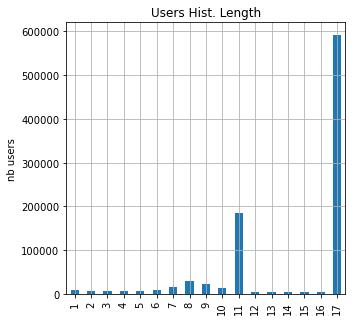

In [13]:
user_hist_len_hist = user_hist_len.clip(0, 100).value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
user_hist_len_hist.plot(
    kind='bar',
    grid=True,
    title='Users Hist. Length',
    ax=ax)

ax.set_ylabel('nb users')

# Number of Transactions per Month

Text(0.5, 0, 'date')

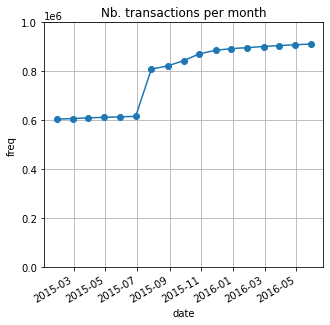

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

n_trasactions_day.plot(
    grid=True,
    marker='o',
    ylim=(0, 1e+6))
ax.set_title('Nb. transactions per month')
ax.set_ylabel('freq')
ax.set_xlabel('date')

# Most popular item per month

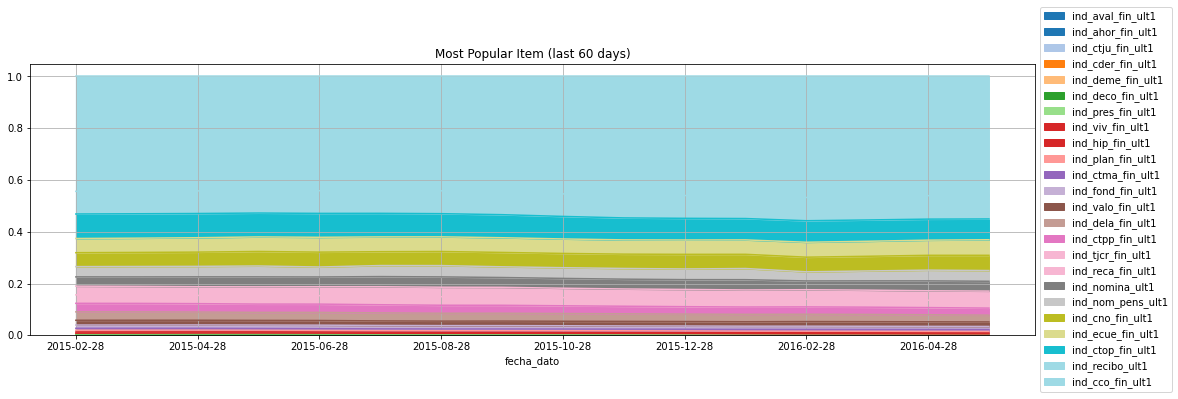

In [107]:
item_most_pop = item_most_popular.get().set_index('fecha_dato')

items = item_most_pop.sum().sort_values().index
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
item_most_pop.iloc[1:][items].plot(
    kind='area',
    ax=ax,
    cmap='tab20',
    stacked=True,
    grid=True)
ax.set_title('Most Popular Item (last 60 days)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Sample user hist

In [102]:
user_ids = data['ncodpers'].sample(9, random_state=1)
data_grp = data.groupby('ncodpers')

fig, ax = plt.subplots(3, 3, figsize=(15, 18))
ax = ax.flatten()

for it, user_id in enumerate(user_ids):
    user_data = data_grp.get_group(user_id)
    ax[it].imshow(user_data[PRODUCT_FEATURES])
    ax[it].set_title(user_id)
    ax[it].set_ylabel('# item in hist')
    ax[it].set_xlabel('products')